In [19]:
import matplotlib.pyplot as pyplot
import numpy as np

In [20]:
timing  = np.genfromtxt('csv/kaijuTiming_1.csv', delimiter=',', dtype='str')
traceId = np.array(timing[1:,0])
spanId = np.array(timing[1:,1])
startTime = np.array(timing[1:,2]).astype(np.int64)
duration = np.array(timing[1:,3]).astype(np.int64)
eventTime = np.array(timing[1:,4]).astype(np.int64)
eventTime_f = np.add(eventTime, 7200)
t_end_span = np.add(startTime, duration)
t_diff = np.subtract(eventTime_f, np.divide(t_end_span, 1000))

j_timing  = np.genfromtxt('csv/jaegerTiming_1.csv', delimiter=',', dtype='str')
j_traceId = np.array(j_timing[1:,0])
j_spanId = np.array(j_timing[1:,1])
j_startTime = np.array(j_timing[1:,2]).astype(np.int64)
j_duration = np.array(j_timing[1:,3]).astype(np.int64)
j_eventTime = np.array(j_timing[1:,4]).astype(np.int64)
j_eventTime_f = np.add(j_eventTime, 7200)
j_t_end_span = np.add(j_startTime, j_duration)
j_t_diff = np.subtract(j_eventTime_f, np.divide(j_t_end_span, 1000))

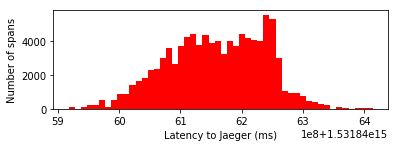

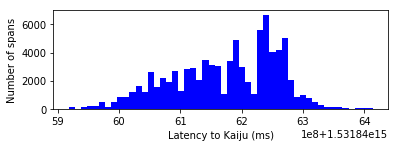

In [21]:
pyplot.subplot(2, 1, 1)
pyplot.hist(j_t_diff, 50, color='r')
pyplot.xlabel('Latency to Jaeger (ms)')
pyplot.ylabel('Number of spans')
pyplot.show()

pyplot.subplot(2, 1, 2)
pyplot.hist(t_diff, 50, color='b')
pyplot.xlabel('Latency to Kaiju (ms)')
pyplot.ylabel('Number of spans')
pyplot.show()

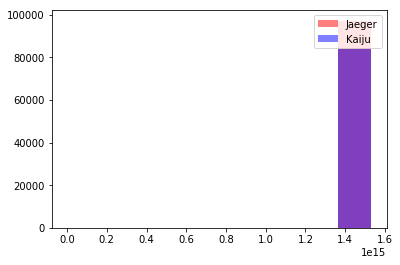

In [22]:
bins = np.linspace(0, max(np.amax(j_t_diff), np.amax(t_diff)), 10)

pyplot.hist(j_t_diff, bins, alpha=0.5, label='Jaeger', color='r')
pyplot.hist(t_diff, bins, alpha=0.5, label='Kaiju', color='b')
pyplot.legend(loc='upper right')
pyplot.show()

In [23]:
traceIdinds = traceId.argsort()
sortedByTrace_traceId = traceId[traceIdinds[::-1]]
sortedByTrace_eventTime = eventTime[traceIdinds[::-1]]

traces = np.unique(sortedByTrace_traceId).tolist()
trace_firstSpan = np.zeros(len(traces), dtype='int64')
trace_lastSpan = np.zeros(len(traces), dtype='int64')
numSpansPerTrace = np.zeros(len(traces), dtype='int64')

t = 0
for trace in traces:
    i, = np.where(sortedByTrace_traceId == trace)
    sortedByTrace_eventTime_i = sortedByTrace_eventTime[i]
    sorted_sortedByTrace_eventTime_i = np.sort(sortedByTrace_eventTime_i)
    trace_firstSpan[t] = sorted_sortedByTrace_eventTime_i[0]
    trace_lastSpan[t] = sorted_sortedByTrace_eventTime_i[-1]
    numSpansPerTrace[t] = len(sortedByTrace_eventTime_i)
    t +=1
    
j_traceIdinds = j_traceId.argsort()
j_sortedByTrace_traceId = j_traceId[j_traceIdinds[::-1]]
j_sortedByTrace_eventTime = j_eventTime[j_traceIdinds[::-1]]

j_traces = np.unique(j_sortedByTrace_traceId).tolist()
j_trace_firstSpan = np.zeros(len(j_traces), dtype='int64')
j_trace_lastSpan = np.zeros(len(j_traces), dtype='int64')
j_numSpansPerTrace = np.zeros(len(j_traces), dtype='int64')

j_t = 0
for trace in j_traces:
    i, = np.where(j_sortedByTrace_traceId == trace)
    j_sortedByTrace_eventTime_i = j_sortedByTrace_eventTime[i]
    j_sorted_sortedByTrace_eventTime_i = np.sort(j_sortedByTrace_eventTime_i)
    j_trace_firstSpan[j_t] = j_sorted_sortedByTrace_eventTime_i[0]
    j_trace_lastSpan[j_t] = j_sorted_sortedByTrace_eventTime_i[-1]
    j_numSpansPerTrace[j_t] = len(j_sortedByTrace_eventTime_i)
    j_t +=1

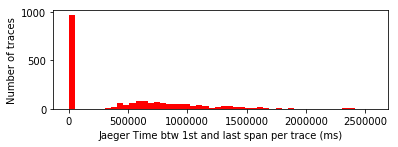

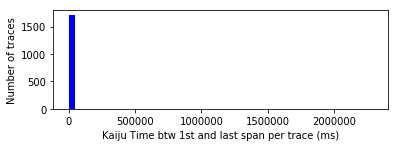

In [24]:
pyplot.subplot(2, 1, 1)
j_t_diff_per_trace = np.subtract(j_trace_lastSpan, j_trace_firstSpan)
pyplot.hist(j_t_diff_per_trace, 50, color='r')
pyplot.xlabel('Jaeger Time btw 1st and last span per trace (ms)')
pyplot.ylabel('Number of traces')
pyplot.show()

pyplot.subplot(2, 1, 2)
t_diff_per_trace = np.subtract(trace_lastSpan, trace_firstSpan)
pyplot.hist(t_diff_per_trace, 50, color='b')
pyplot.xlabel('Kaiju Time btw 1st and last span per trace (ms)')
pyplot.ylabel('Number of traces')
pyplot.show()

#Jaeger all spans of a trace almost together but higher latencies, notice also exceptions (high timestamps)

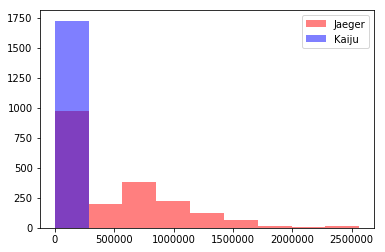

In [25]:
bins = np.linspace(0, max(np.amax(j_t_diff_per_trace), np.amax(t_diff_per_trace)), 10)

pyplot.hist(j_t_diff_per_trace, bins, alpha=0.5, label='Jaeger', color='r')
pyplot.hist(t_diff_per_trace, bins, alpha=0.5, label='Kaiju', color='b')
pyplot.legend(loc='upper right')
pyplot.show()

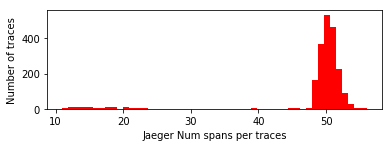

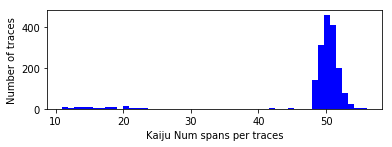

In [26]:
pyplot.subplot(2, 1, 1)
pyplot.hist(j_numSpansPerTrace, 50, color='r')
pyplot.xlabel('Jaeger Num spans per traces')
pyplot.ylabel('Number of traces')
pyplot.show()

pyplot.subplot(2, 1, 2)
pyplot.hist(numSpansPerTrace, 50, color='b')
pyplot.xlabel('Kaiju Num spans per traces')
pyplot.ylabel('Number of traces')
pyplot.show()